# Basis Daten

### Import & konstanten 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy
import seaborn as sns

### Daten auslesen

In [ ]:
PFAD : str = "Daten/Merged_BSR_24Uhr_23mittel.csv"
basis_df =pd.read_csv(PFAD, delimiter=",", decimal=".")
basis_df.info()
print(basis_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381661 entries, 0 to 381660
Data columns (total 91 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Schicht                                     381661 non-null  int64  
 1   Tour                                        381661 non-null  int64  
 2   Tonnage                                     381661 non-null  float64
 3   Temperature_Max (°C)                        381661 non-null  float64
 4   Rain_Sum (mm)                               381661 non-null  float64
 5   Snowfall_Sum (cm)                           381661 non-null  float64
 6   Wind_Speed_Max (km/h)                       381661 non-null  float64
 7   Daylight_Duration (s)                       381661 non-null  float64
 8   Temperature_Max (°C) 3-Day Avg              381661 non-null  float64
 9   Rain_Sum (mm) 3-Day Avg                     381661 non-null  float64
 

### Tonnage von 

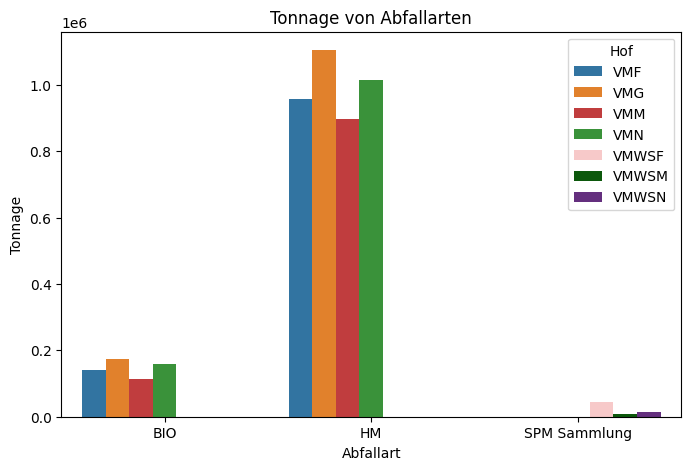

In [120]:
custom_colors = {
    "VMF": "#1f77b4",
    "VMG": "#ff7f0e",
    "VMN": "#2ca02c",
    "VMM": "#d62728",
    "VMWSF": "#ffc1c1",
    "VMWSM": "#006400",
    "VMWSN": "#68228b"
}

tonnage_sum = basis_df.groupby(["Hof", "Abfallart"])["Tonnage"].sum().reset_index()


plt.figure(figsize=(8, 5))

sns.barplot(
    data=tonnage_sum,          
    x="Abfallart",             
    y="Tonnage",               
    hue="Hof",                 
    palette=custom_colors      
)



plt.xlabel("Abfallart")
plt.ylabel("Tonnage")
plt.title("Tonnage von Abfallarten")

plt.show()

### Tonnage von Jahren

Jahr
2019    913775.87
2020    945783.48
2021    949768.73
2022    908454.68
2023    910033.66
Name: Tonnage, dtype: float64


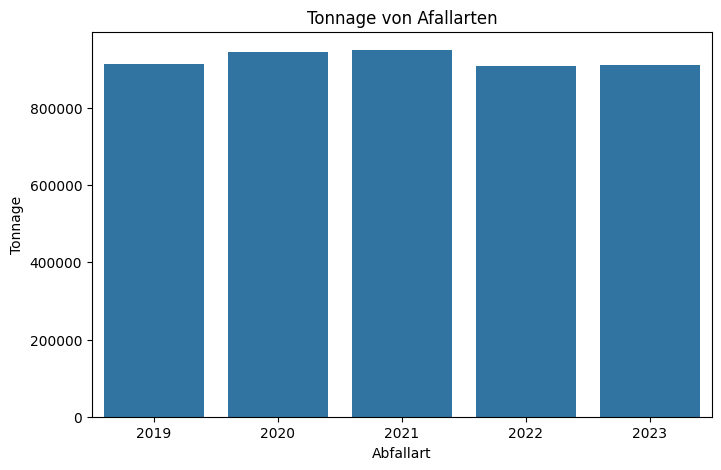

In [121]:
tonnage_sum = basis_df.groupby("Jahr")["Tonnage"].sum()

plt.figure(figsize=(8, 5))
sns.barplot(x=tonnage_sum.index, y=tonnage_sum.values)

plt.xlabel("Abfallart")
plt.ylabel("Tonnage")
plt.title("Tonnage von Afallarten")

print(tonnage_sum)

plt.show()

### Abfall zu bestimmten Zeiten

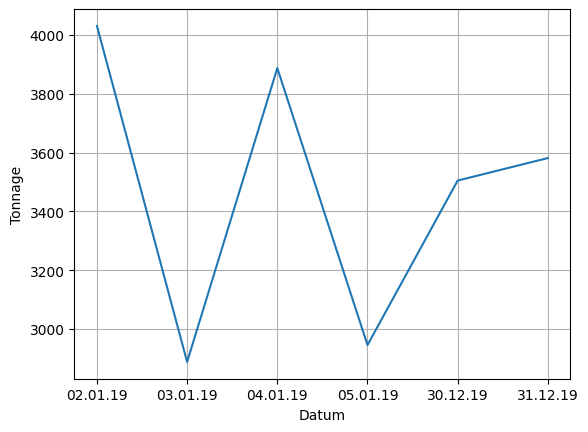

In [122]:
plt.xlabel("Datum")

plt.ylabel("Tonnage")

filter_df = basis_df[basis_df["Jahr"] == int(2019)]

# filter_df_df = filter_df[filter_df["Monat"]==int(1)]

filter_df = filter_df[filter_df["KW"]==int(1)]

# filter_df = filter_df[filter_df["Tour"]==int(1)]

# filter_df = filter_df[filter_df["Hof"]==str("VMF")]

# Gruppiere nach Tour und summiere die Tonnage
filter_df = filter_df.groupby('Datum')['Tonnage'].sum().reset_index()

plt.plot(filter_df["Datum"], filter_df["Tonnage"])

plt.grid(True)

plt.show()

### Gesamte Tonnage für alle Höfe verteilt auf Kalenderwoche

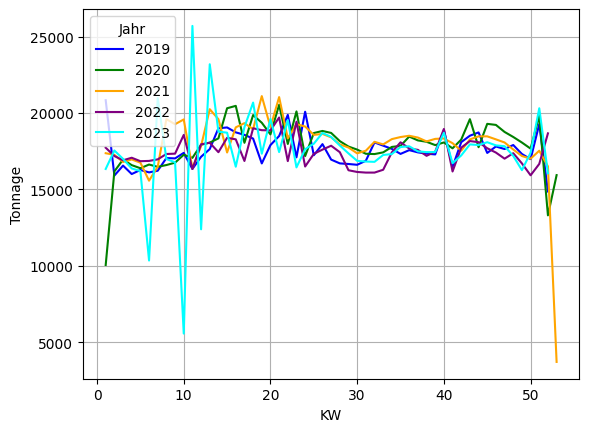

In [123]:
plt.xlabel("KW")

plt.ylabel("Tonnage")


#2019

filter_df19 = basis_df[basis_df["Jahr"] == int(2019)]

filter_df19 = filter_df19.groupby('KW')['Tonnage'].sum().reset_index()

#2020

filter_df20 = basis_df[basis_df["Jahr"] == int(2020)]

filter_df20 = filter_df20.groupby('KW')['Tonnage'].sum().reset_index()

#2021

filter_df21 = basis_df[basis_df["Jahr"] == int(2021)]

filter_df21 = filter_df21.groupby('KW')['Tonnage'].sum().reset_index()

#2022

filter_df22 = basis_df[basis_df["Jahr"] == int(2022)]

filter_df22 = filter_df22.groupby('KW')['Tonnage'].sum().reset_index()

#2023

filter_df23 = basis_df[basis_df["Jahr"] == int(2023)]

filter_df23 = filter_df23.groupby('KW')['Tonnage'].sum().reset_index()

#plot

plt.plot(filter_df19["KW"], filter_df19["Tonnage"], color = "blue", label="2019")

plt.plot(filter_df20["KW"], filter_df20["Tonnage"], color = "green", label="2020")

plt.plot(filter_df21["KW"], filter_df21["Tonnage"], color = "orange", label="2021")

plt.plot(filter_df22["KW"], filter_df22["Tonnage"], color = "purple", label="2022")

plt.plot(filter_df23["KW"], filter_df23["Tonnage"], color = "cyan", label="2023")

plt.legend(loc='upper left',title="Jahr")
plt.grid(True)

plt.show()

### Notizen
- 2023 Warnstreiks

Quelle:
https://www.bsr.de/presse-20012.php

folgendes ist noch flasch

In [124]:
# plt.xlabel("Tag des Monats")
# plt.ylabel("Tonnage")

# # Annahme: basis_df hat eine Spalte "Datum" im Format YYYY-MM-DD
# basis_df["Datum"] = pd.to_datetime(basis_df["Datum"])
# basis_df["Tag"] = basis_df["Datum"].dt.day

# # Filtere nach KW 10
# basis_df = basis_df[basis_df["KW"] == int(53)]

# # 2019
# filter_df19 = basis_df[basis_df["Jahr"] == int(2019)].groupby('Datum')['Tonnage'].sum().reset_index()
# filter_df19["Tag"] = filter_df19["Datum"].dt.day  # Tag extrahieren

# # 2020
# filter_df20 = basis_df[basis_df["Jahr"] == int(2020)].groupby('Datum')['Tonnage'].sum().reset_index()
# filter_df20["Tag"] = filter_df20["Datum"].dt.day

# # 2021
# filter_df21 = basis_df[basis_df["Jahr"] == int(2021)].groupby('Datum')['Tonnage'].sum().reset_index()
# filter_df21["Tag"] = filter_df21["Datum"].dt.day

# # 2022
# filter_df22 = basis_df[basis_df["Jahr"] == int(2022)].groupby('Datum')['Tonnage'].sum().reset_index()
# filter_df22["Tag"] = filter_df22["Datum"].dt.day

# # 2023
# filter_df23 = basis_df[basis_df["Jahr"] == int(2023)].groupby('Datum')['Tonnage'].sum().reset_index()
# filter_df23["Tag"] = filter_df23["Datum"].dt.day

# # Plot
# plt.plot(filter_df19["Tag"], filter_df19["Tonnage"], color="blue", label="2019")
# plt.plot(filter_df20["Tag"], filter_df20["Tonnage"], color="green", label="2020")
# plt.plot(filter_df21["Tag"], filter_df21["Tonnage"], color="orange", label="2021")
# plt.plot(filter_df22["Tag"], filter_df22["Tonnage"], color="purple", label="2022")
# plt.plot(filter_df23["Tag"], filter_df23["Tonnage"], color="cyan", label="2023")

# # Legende und Gitter
# plt.legend(loc='upper left', title="Jahr")
# plt.grid(True)

# # Plot anzeigen
# plt.show()


2023 bis zum 4 Monat mitteln

In [136]:
PFAD2 = "../bsr_ki/Daten/Merged_BSR_24Uhr23mittel.csv"
basis_df2 =pd.read_csv(PFAD2, delimiter=",", decimal=",")

C:\Users\leona\AppData\Local\Temp\ipykernel_21112\3370757108.py:2: DtypeWarning: Columns (33,34,35,36,37,38,39,40,41,42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  basis_df2 =pd.read_csv(PFAD2, delimiter=",", decimal=",")


In [129]:
# basis_df2 = basis_df2[basis_df2["Jahr"] == int(2023)]

# basis_df2 = basis_df2[basis_df2["Monat"] == int(1),int(2),int(3)]

In [ ]:
# basis_df2['gemittelter_Wert'] = basis_df2.groupby('month')['Tonnage'].transform('mean')
# plt.plot(filter_df23["KW"], filter_df23["Tonnage"], color = "cyan", label="2023")

KeyError: 'month'

In [ ]:
# Filter für Zeitbereich
filter_mask = (basis_df2['month'] >= int(1)) & (basis_df2['month'] <= int(3))

filter_mask = filter_mask[filter_mask["year"] == int(2023)]

# Mittelwert berechnen
mean_value = basis_df.loc[filter_mask, "Tonnage"].mean()

# Werte im Zeitbereich durch Mittelwert ersetzen
basis_df2.loc[filter_mask, "Tonnage"] = mean_value

# Aktualisierte CSV-Datei speichern
basis_df2.to_csv(PFAD2, index=False, sep=';', decimal=",")